In [26]:
import pandas as pd
import os

import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:

ecb_with_sentiment = pd.read_csv('./ecb_with_sentiment_bert.csv')
ecb_with_sentiment.head()

ecb_with_sentiment=ecb_with_sentiment.drop(columns=["contents"])
# ecb_with_sentiment = ecb_with_sentiment.loc[ecb_with_sentiment.subtitle.str.contains("\sMember\s"),:]

In [28]:
ecb_with_sentiment.to_csv('./ecb_sentiment_only_bert.csv')

In [29]:
ecb_with_sentiment.head()

,Unnamed: 0,date,speakers,title,subtitle,mean,std,pos_mean,pos_std,neu_mean,neu_std,neg_mean,neg_std,pos_np,neu_np,neg_np
0,0,2021-05-27,Isabel Schnabel,Societal responsibility and central bank indep...,"Keynote speech by Isabel Schnabel, Member of t...",-0.085368,0.387858,0.139730,0.144982,0.635173,0.270962,0.225097,0.301508,[0.21838163 0.03354283 0.02778754 0.03855713 0...,[0.76848191 0.91455883 0.28564495 0.55031949 0...,[0.01313641 0.05189829 0.68656749 0.41112337 0...
1,1,2021-05-27,Luis de Guindos,Climate change and financial integration,"Keynote speech by Luis de Guindos, Vice-Presid...",-0.026956,0.505761,0.202748,0.253906,0.567549,0.347908,0.229703,0.352064,[0.08870706 0.35806265 0.01477082 0.9309842 0...,[0.70682108 0.63062811 0.02607576 0.05536489 0...,[0.20447177 0.01130923 0.95915341 0.0136509 0...
2,3,2021-05-19,Fabio Panetta,At the edge of tomorrow: preparing the future ...,"Introductory remarks by Fabio Panetta, Member ...",0.316743,0.307511,0.381715,0.239636,0.553313,0.252128,0.064972,0.147106,[0.23331414 0.50757241 0.2567094 0.85213768 0...,[0.75631839 0.48265964 0.26314804 0.14051794 0...,[0.01036743 0.00976786 0.48014256 0.00734432 0...
3,4,2021-05-06,Christine Lagarde,Towards a green capital markets union for Europe,"Speech by Christine Lagarde, President of the ...",0.494729,0.233734,0.509391,0.228311,0.475947,0.223262,0.014662,0.010632,[0.60571969 0.07047932 0.67631507 0.56479281 0...,[0.38253784 0.90226835 0.31308943 0.40945569 0...,[0.01174252 0.02725238 0.01059556 0.02575157 0...
4,6,2021-04-29,Frank Elderson,All the way to zero: guiding banks towards a c...,"Keynote speech by Frank Elderson, Vice-Chair o...",0.221424,0.373454,0.308234,0.272779,0.604956,0.269417,0.086810,0.177816,[0.62994921 0.748299 0.10959322 0.38741919 0...,[0.35543764 0.24172987 0.79927289 0.59703314 0...,[0.01461315 0.00997107 0.09113391 0.01554759 0...


1711
0.34346669402907465
0.1


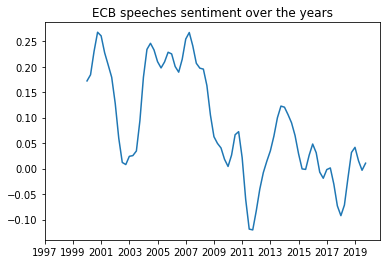

1712
0.3153630042120338
0.14210526315789473


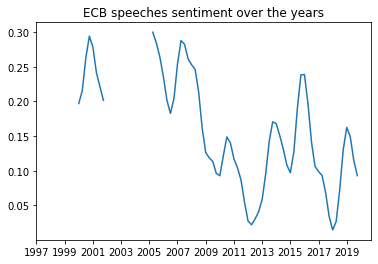

1714
0.41019069751723847
0.1842105263157895


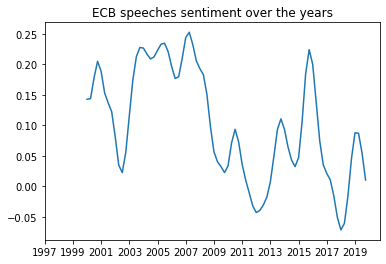

1714
0.4104435634780154
0.22631578947368422


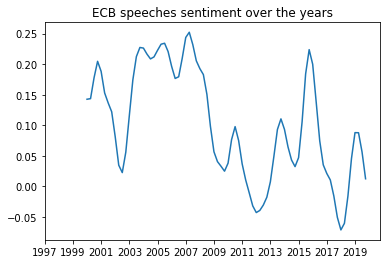

1714
0.4104435634780154
0.26842105263157895


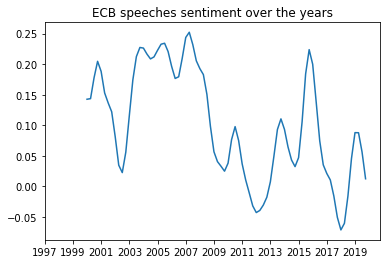

1714
0.4104435634780154
0.31052631578947365


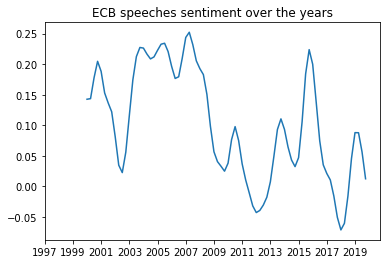

1714
0.4104435634780154
0.3526315789473684


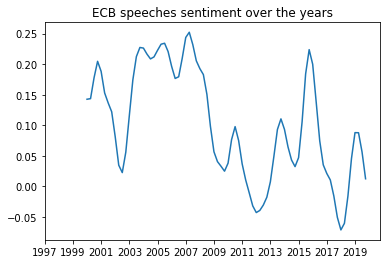

1714
0.4104435634780154
0.39473684210526316


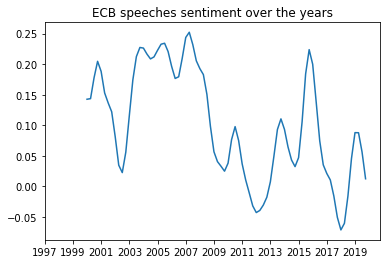

1714
0.4104435634780154
0.4368421052631579


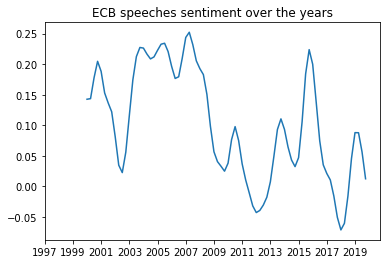

1714
0.4104435634780154
0.4789473684210527


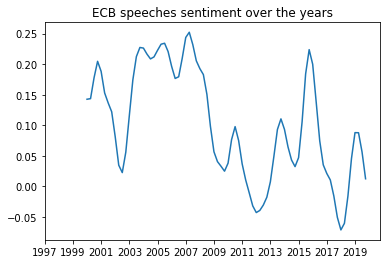

1714
0.4104435634780154
0.5210526315789473


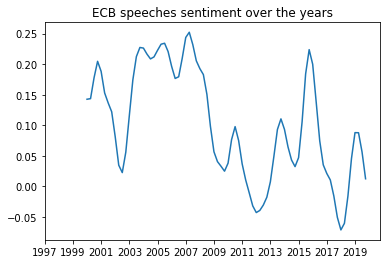

1714
0.4104435634780154
0.5631578947368421


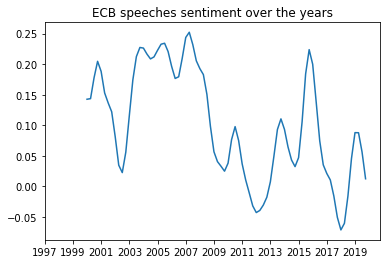

1714
0.4104435634780154
0.6052631578947368


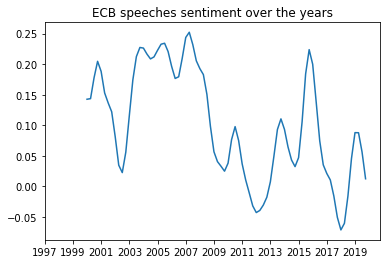

1714
0.4104435634780154
0.6473684210526316


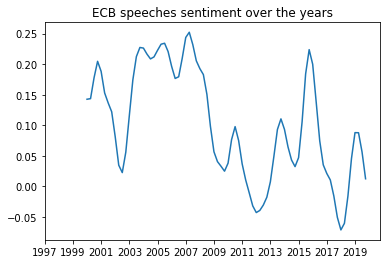

1714
0.4104435634780154
0.6894736842105262


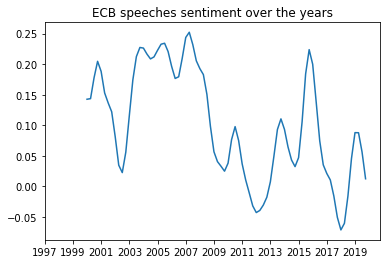

1714
0.4104435634780154
0.731578947368421


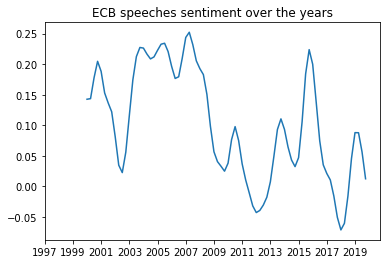

1714
0.4104435634780154
0.7736842105263158


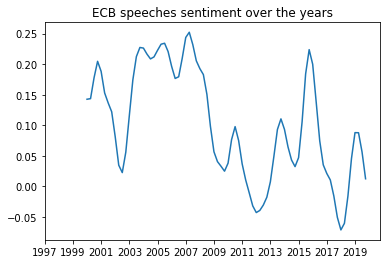

1714
0.4104435634780154
0.8157894736842105


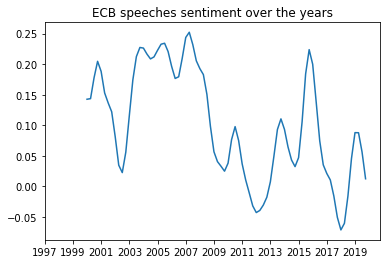

1714
0.4104435634780154
0.8578947368421053


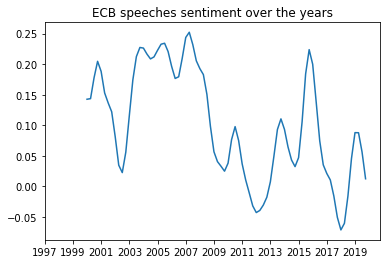

1714
0.4104435634780154
0.9


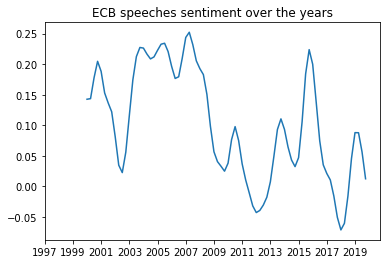

In [32]:

from scipy.ndimage.filters import gaussian_filter1d
# threshold_neutral = 0.6

#0.5 0.5 (no shift mean)
#0.6 0.6 (no shift mean)
threshold_significance = 0.65
threshold_mean_significance = 0.65
threshold_significance_fss = 0

for threshold_neutral in np.linspace(0.1,0.9,20):
    def remove_neutral(pos, neu, neg):
        pos = np.fromstring(pos[1:-1],sep=' ')
        neu = np.fromstring(neu[1:-1],sep=' ')
        neg = np.fromstring(neg[1:-1],sep=' ')
        combined = np.array([pos,neu,neg]).T #(num_of_sent,3)
        filtered = combined[neu<threshold_neutral]
        res = (filtered.T[0]-filtered.T[2]) 
        res = res[np.abs(res)>threshold_significance]
        return res

    def fss(pos, neg):
        pos = np.fromstring(pos[1:-1],sep=' ')
        neg = np.fromstring(neg[1:-1],sep=' ')
        combined = pos - neg
        filtered = combined[np.abs(combined)>=threshold_significance_fss]
        filtered = (np.heaviside(filtered, 0) -0.5) *2
        if len(filtered) == 0:
            return 0
        else:
            return filtered.mean()

    ecb_with_sentiment['filtered'] = ecb_with_sentiment.apply(lambda row: remove_neutral(row['pos_np'],row['neu_np'],row['neg_np']),axis=1)

    ecb_with_sentiment['filtered_mean'] = ecb_with_sentiment.apply(lambda row: row['filtered'].mean(),axis=1)

    ecb_with_sentiment['filtered_std'] = ecb_with_sentiment.apply(lambda row: row['filtered'].std(),axis=1)

    ecb_with_sentiment['fss'] = ecb_with_sentiment.apply(lambda row: fss(row['pos_np'], row['neg_np']),axis=1)
    


    old = len(ecb_with_sentiment)
    ecb_with_sentiment_new = ecb_with_sentiment[np.abs(ecb_with_sentiment.filtered_mean) > threshold_mean_significance]
    new = len(ecb_with_sentiment_new)
    print(old-new)

    # for each time interval (quarterly)
    #    check speech overal sentiment
    #    plot graph
    
    # quarters = ["({0})".format(i) for i in range(1,13)]
    quarters = ["(1|2|3)","(4|5|6)", "(7|8|9)","(10|11|12)"]
    # quarters = ["(1|2|3|4|5|6|7|8|9|10|11|12)"]
    # quarters = ["(1|2|3|4|5|6)","(7|8|9|10|11|12)"]

    col = ["year","quarter","mean","std",] # "fss_mean", "fss_std", "pos_mean", "pos_std", "neg_mean","neg_std"])

    quarterly_data = pd.DataFrame(columns = col) 


    for year in range(1997,2022):
        for index, quarter in enumerate(quarters):
            data = ecb_with_sentiment_new.loc[ecb_with_sentiment['date'].str.contains(str(year) + '-0?' + quarter + '-'), :]
            # assume sample mean (neglect difference in datapoints)
            temp_data = pd.DataFrame([[year, index + 1, data['fss'].mean(), (data['filtered_std']**2).mean()**0.5]],columns = col)
        
            quarterly_data = quarterly_data.append(temp_data, ignore_index = True)

    quarterly_data.to_csv('./ecb_sentiment_quarterly_bert.csv')


    year = [[ year + index/4 for index in range (0, 4) ]for year in range(1997,2022)]
    year = [item for sublist in year for item in sublist]
    # year = [ year for year in range(1997,2022)]
    mean = quarterly_data['mean'].to_numpy()
        
    mean = gaussian_filter1d(mean, sigma=1.5)
  
    shift = np.nan_to_num(mean).mean()

    print(shift)
    mean = mean - shift

    # std = quarterly_data['std'].to_numpy()
        
    # std = gaussian_filter1d(std, sigma=1) 
    # fss_mean = quarterly_data['fss_mean'].to_numpy()
    # fss_std = quarterly_data['fss_std'].to_numpy()
    # pos_mean = quarterly_data['pos_mean'].to_numpy()
    # pos_std = quarterly_data['pos_std'].to_numpy()
    # neg_mean = quarterly_data['neg_mean'].to_numpy()
    # neg_std = quarterly_data['neg_std'].to_numpy()

    fig = plt.figure()


    # import scipy.signal as signal

    # sos = signal.butter(536, 35, 'lp', fs=1000, output='sos')
    # filtered = signal.sosfiltfilt(sos, mean)

    x = year
    y = mean * 1
    # yerr = std
    
    # plt.errorbar(x, y, yerr = yerr)
    plt.plot(x,y)

    # plt.fill_between(x, y-yerr, y+yerr,
    #     alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
    
    plt.xticks(np.arange(1997, 2021, 2))
    # plt.xlim(2000,2019)
    plt.title('ECB speeches sentiment over the years')
    print(threshold_neutral)
    plt.pause(0.1)
plt.show()
